In [1]:
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

In [2]:
path = 'tensorboard/20201101-085145-timegan-eta10/'

In [3]:
with open(f"{path}/ori.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/new.pickle", "rb") as fb:
    new_data = pickle.load(fb)

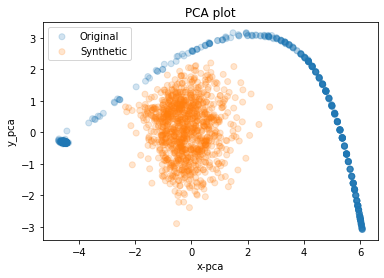

In [4]:
visualization(ori_data, new_data, 'pca')